# 1.-. Introducción

Hoy en día las encuestas de salud son una parte fundamental del sistema de salud de cualquier país, y ayudan a la toma de decisiones relativas a las políticas de salud. La información que proporcionan se divide en dos grandes apartados:
- Estado de salud
Se refiere a la autovaloración de la salud, restricción de la actividad, discapacidad y dependencia, salud mental, calidad de vida relacionada con la salud, y enfermedades crónicas.
- Determinantes de salud
En este apartado se recogen las condiciones socioeconómicas de vida y de trabajo, ingresos, situación económica, trabajo doméstico y de cuidado, entorno de la vivienda, discriminación o factores psicosociales. 

### 1.1.- Objetivos y alcance del proyecto

Este proyecto se basa en los datos extraídos de la encuesta de salud que elabora anualmente el Behavioral Risk Factor Surveillance System (BRFSS), para recopilar datos sobre la salud de los residentes en EE.UU.

Según  CDC (Centers for Disease Control and Prevention), las cardiopatías son una de las principales causas de muerte en la mayoría de las razas de EE.UU. (afroamericanos, indios americanos y nativos de Alaska, y blancos). Aproximadamente la mitad de los estadounidenses (47%) presentan al menos 1 de los 3 factores de riesgo clave de las cardiopatías: hipertensión, colesterol alto y tabaquismo. Otros indicadores clave son la diabetes, la obesidad (IMC elevado), no realizar suficiente actividad física o la ingesta de alcohol. Detectar y prevenir los factores que más influyen en las cardiopatías es muy importante en la asistencia sanitaria. 

Los avances informáticos permiten aplicar métodos de Machine Learning, para detectar patrones a partir de los datos recogidos en las encuestas de salud, que pueden predecir el estado de un paciente. En este caso, el objetivo del proyecto es diseñar un modelo de Machine Learning que pueda predecir la probabilidad de sufrir una afección cardíaca, por medio de modelos supervisados de Machine Learning, ya que tenemos una variable target para cada muestra, denominada *HeartDisease*.

# 2.- Dataset

### 2.1.- Dataset utilizado

El dataset que se estudia en este proyecto corresponde a la encuesta realizada por el BRFSS en 2020. Tiene en total 320.000 filas y 18 columnas, que corresponden a las respuestas dadas por los ciudadanos a las preguntas efectuadas. Las variables consideradas son:
- *HeartDisease*: Variable categórica con valor Sí/No. Se refiere a sufrir o haber sufrido una enfermedad coronaria o un infarto de miocardio. Esta es la variable target que hay que predecir en el estudio.
- *BMI*. Indice de masa corporal. Variable continua, se obtiene dividiendo el peso de la persona, en kg, entre su estatura, expresada en metros, elevada al cuadrado. 
- *Smoking*: Variable categórica, con valor Sí/No, respondiendo a la pregunta: ¿Ha fumado al menos 100 cigarrillos a lo largo de su vida?
- *AlcoholDrinking*: Variable categórica, con valor Sí/No, para detectar a los "Heavy Drinkers", hombres que toman más de 14 bebidas alcohólicas a la semana o 7 en el caso de las mujeres.
- *Stroke*: Variable categórica con valor Sí/No respondiendo a ¿Ha sufrido alguna vez un accidente cerebrovascular?
- PhysicalHealth: Respuesta con valor numérico a la pregunta:¿Durante cuantos días de los últimos 30 no ha tenido buena salud física?
- *MentalHealth*: Respuesta con valor numérico a la pregunta:¿Durante cuantos días de los últimos 30 no ha tenido buena salud mental?
- *DiffWalking*: Variable categórica con valor Sí/No, cuya pregunta era: ¿Tiene dificultades para andar o subir escaleras?
- *Sex*. Variable nominal, con valor Hombre/Mujer.
- *AgeCategory*: Variable ordinal referida a un intervalo de edad.
- *Race*: Variable nominal, referida al grupo étnico del encuestado.
- *Diabetic*: Variable categórica con valor Sí/No respondiendo a: ¿Ha tenido alguna vez diabetes?
- *PhysicalActivity*: Respuesta SÍ/No a la pregunta ¿Ha realizado algún ejercicio físico aparte del trabajo en los últimos 30 días?
- *GenHealth*: Variable ordinal como respuesta a: Diría que su salud en general es... 
- *SleepTime*: Variable numérica, para expresar el número de horas diarias de sueño
- *Asthma*: Variable categórica con valor Sí/No respondiendo a: ¿Es asmático?
- *KidneyDisease*: Variable categórica con valor Sí/No respondiendo a: Sin incluir cálculos renales, infección de vejiga o incontinencia, ¿le han diagnosticado alguna vez una enfermedad renal?
- *SkinCancer*: Variable categórica con valor Sí/No respondiendo a: ¿Ha tenido o tiene cáncer de piel?

### 2.2.- Análisis exploratorio de los datos (EDA)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#### 2.2.1.- Información básica del dataset

In [2]:
df = pd.read_csv('data/heart_2020_cleaned.csv', sep=",")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [32]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [33]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

#### 2.2.2.- Análisis univariante

Comprobamos que la variable target no está balanceada entre las clases "Yes" y "No".

In [34]:
df['HeartDisease'].value_counts(normalize=True)

HeartDisease
No     0.914405
Yes    0.085595
Name: proportion, dtype: float64

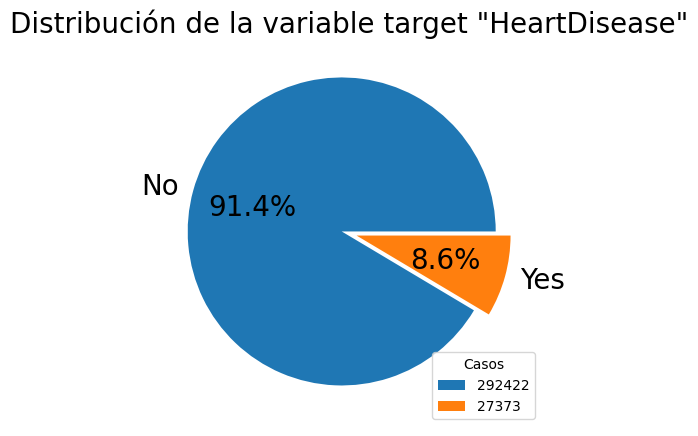

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = df['HeartDisease'].value_counts().index
sizes = df['HeartDisease'].value_counts()

plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':20, 'color':"black"},
        explode=[0.05, 0.05])
plt.title('Distribución de la variable target "HeartDisease"',color = 'black',fontsize = 20)
plt.legend(df.HeartDisease.value_counts(), loc = 'lower right', title = 'Casos')
plt.show()

In [36]:
categ_data=[]
for i in df.columns:
    if df[i].dtype==object  :
        categ_data.append (i)
print(categ_data)

['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


Text(0.5, 1.0, 'BMI')

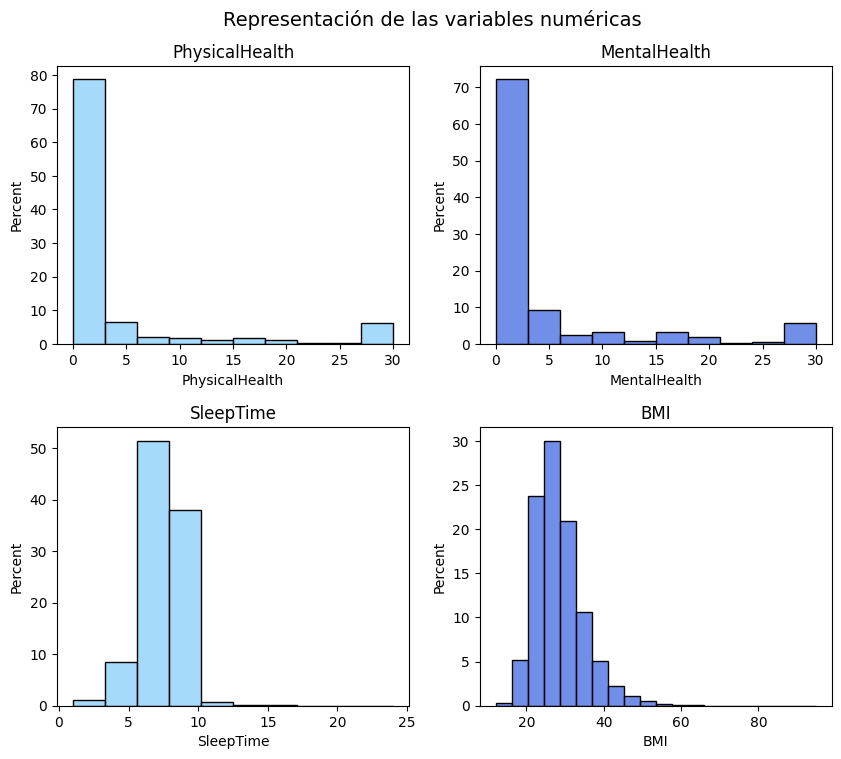

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Representación de las variables numéricas', fontsize=14)
plt.subplots_adjust(top=0.91 )

plt.subplots_adjust(hspace = 0.3)

sns.histplot(df['PhysicalHealth'], ax=axes[0, 0], bins=10, stat='percent', color='lightskyblue')
axes[0, 0].set_title("PhysicalHealth")

sns.histplot(df['MentalHealth'], ax=axes[0, 1], bins=10, stat='percent', color='royalblue')
axes[0, 1].set_title("MentalHealth")

sns.histplot(df['SleepTime'], ax=axes[1, 0], bins=10, stat='percent', color='lightskyblue')
axes[1, 0].set_title("SleepTime")

sns.histplot(df['BMI'], ax=axes[1, 1], bins=20, stat='percent', color='royalblue')
axes[1, 1].set_title("BMI")

<Axes: xlabel='SkinCancer', ylabel='Percent'>

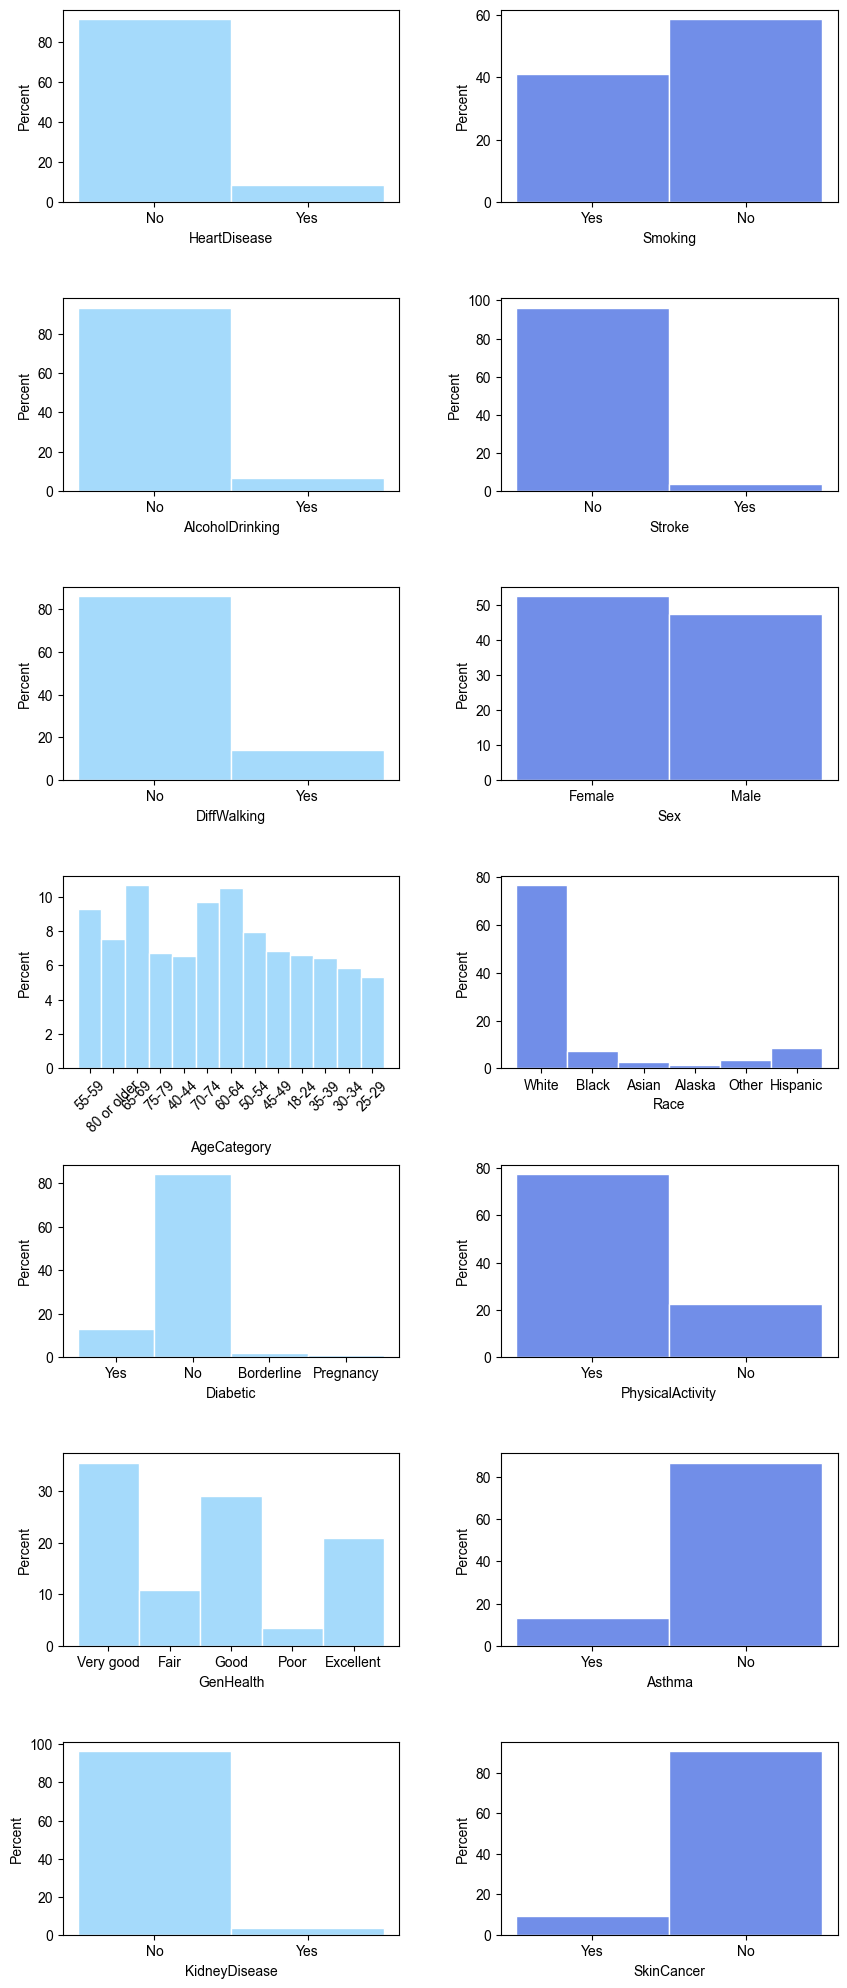

In [38]:

fig, axes = plt.subplots(7, 2, figsize=(10, 25))
plt.subplots_adjust(hspace = 0.5, wspace=0.3)
sns.set_style("whitegrid")
sns.histplot(x=df["HeartDisease"], ax=axes[0,0], stat='percent', color='lightskyblue')

sns.histplot(x=df["Smoking"], ax=axes[0,1], stat='percent', color='royalblue')

sns.histplot(x=df["AlcoholDrinking"], ax=axes[1,0],stat='percent', color='lightskyblue')

sns.histplot(x=df["Stroke"], ax=axes[1,1],stat='percent', color='royalblue')

sns.histplot(x=df["DiffWalking"], ax=axes[2,0], stat='percent', color='lightskyblue')

sns.histplot(x=df["Sex"], ax=axes[2,1], stat='percent', color='royalblue')

sns.histplot(x=df["AgeCategory"], ax=axes[3,0],  stat='percent', color='lightskyblue')
axes[3,0].set_xticklabels(labels=df['AgeCategory'].unique(), rotation=45, ha='center')

sns.histplot(x=df["Race"], ax=axes[3,1], stat='percent', color='royalblue')
axes[3,1].set_xticklabels(labels=['White', 'Black', 'Asian', 'Alaska', 'Other', 'Hispanic'], rotation=0, ha='center', )

sns.histplot(x=df["Diabetic"], ax=axes[4,0], stat='percent', color='lightskyblue')
axes[4,0].set_xticklabels(labels=['Yes', 'No', 'Borderline', 'Pregnancy'], rotation=0, ha='center')

sns.histplot(x=df["PhysicalActivity"], ax=axes[4,1], stat='percent', color='royalblue')

sns.histplot(x=df["GenHealth"], ax=axes[5,0], stat='percent', color='lightskyblue')

sns.histplot(x=df["Asthma"], ax=axes[5,1], stat='percent', color='royalblue')

sns.histplot(x=df["KidneyDisease"], ax=axes[6,0], stat='percent', color='lightskyblue')

sns.histplot(x=df["SkinCancer"], ax=axes[6,1], stat='percent', color='royalblue')


#### 2.2.3.- Análisis bivariante 

##### 2.2.3.1.- Correlación

Al tener variables numéricas y categóricas, en lugar de la matriz de correlación de Pearson, es más útil la matriz Phik. En esta matriz se representa el coeficiente phi φ o rφ, también llamado coeficiente de correlación de Mathews, que es una medida de la asociación entre dos variables binarias. El coeficiente phi tiene un valor máximo que está determinado por la distribución de dos variables. Si ambas están distribuidas al 50%, el rango de phi irá de −1 a +1. En caso contrario, este intervalo es menor. En nuestro dataset, buena parte de las variables están distribuidas de forma desigual. No solamente la variable target *HeartDisease*, sino también *AlcoholDrinking*, *Stroke*, *DiffWalking*, *Asthma*, *KidneyDisease* o *SkinCancer* tienen una distribución muy desigual. Este hecho alterará los valores obtenidos del coeficiente phi.

In [39]:
# !pip install phik

interval columns not set, guessing: ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']


<Axes: >

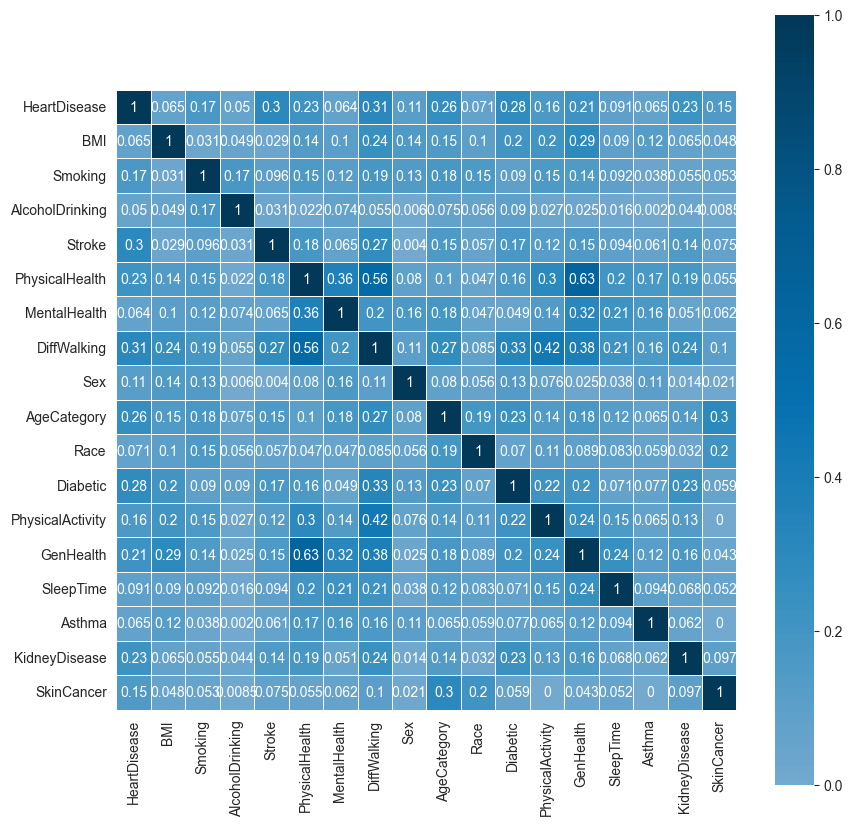

In [40]:
import phik
phik_matrix = df.phik_matrix()

plt.figure(figsize=(10,10))
sns.heatmap(phik_matrix,
            vmin=0,
            vmax=1,
            center=0,
            cmap= 'PuBu',
            square=True,
            annot=True,
            linewidths=.5)

Los niveles de correlación observados son muy bajos, ya no hay ninguna variable que tenga una fuerte correlación con *HeartDisease*, y las variables no están distribuidas al 50%, como ya se ha explicado anteriormente. Es más, hay variables que, según el conocimiento científico existente, podrían tener una mayor correlacción como *BMI*, o *AlcoholDrinking*, pero en realidad tienen valores menores que otras aparentemente menos importantes, como *KidneyDisease* o *SkinCancer*. 

##### 2.2.3.1.- Frecuencia condicionada de la variable target

Para obtener más información sobre la influencia de las variables binarias en el riesgo cardiovascular, se calcula la frecuencia condicionada de la variable *HeartDisease*, es decir, el porcentaje de positivos para dichas variables que también tienen una patología cardíaca. 

Para las variables binarias, es decir, con dos únicas opciones como "Yes" y "No", ó "Male" y "Female", se calcula con este bucle *FOR*.

In [12]:
for i in df.columns[1:]:
    if i == "Sex":
        sex_HeartDisease = df[(df['Sex'] == "Male") & (df['HeartDisease'] == "Yes")].shape[0]
        sex = df[df['Sex'] == "Male"].shape[0]
        print('Sex', round(sex_HeartDisease*100/sex,2),"%")
    if i == 'PhysicalActivity':
        phy_HeartDisease = df[(df['PhysicalActivity'] == "No") & (df['HeartDisease'] == "Yes")].shape[0]
        phy = df[df['PhysicalActivity'] == "No"].shape[0]
        print('PhysicalActivity', round(phy_HeartDisease*100/phy,2),"%")
    elif any(df[i].isin(["Yes", "No"])):
        variable_HeartDisease = df[(df[i] == "Yes") & (df['HeartDisease'] == "Yes")].shape[0]
        variable = df[df[i] == "Yes"].shape[0]
        print(i, round(variable_HeartDisease*100/variable,2),"%")


Smoking 12.16 %
AlcoholDrinking 5.24 %
Stroke 36.37 %
DiffWalking 22.58 %
Sex 10.62 %
Diabetic 21.95 %
PhysicalActivity 13.76 %
Asthma 11.51 %
KidneyDisease 29.33 %
SkinCancer 16.7 %


In [14]:
sex_HeartDisease = df[(df['Sex'] == "Female") & (df['HeartDisease'] == "Yes")].shape[0]
sex = df[df['Sex'] == "Male"].shape[0]
round(sex_HeartDisease*100/sex,2)

7.39

De este cálculo podemos extraer la prevalencia de enfermedades cardíacas en confluencia con otros factores. Tomamos como referencia que las enfermedades cardíacas afectan al 9% del dataset. Cuando la prevalencia calculada sea inferior a este 9%, esa variable no contribuye significativamente a aumentar el riesgo cardiovascular.
- Tabaquismo: más del 12% de los fumadores tiene una enfermedad cardiaca. Este factor parece más importante o influyente, aunque sólo tiene un factor de correlación de 0.17.
- Únicamente el 5,24% de los que beben alcohol tienen enfermedades cardíacas.
- Accidente cerebrovascular: el 36% tienen una patología cardíaca. Este porcentaje tan alto se debe a que las patologías cardíacas pueden provocar este tipo de accidentes.
- Dificultades para andar: el 22% de los que han reconocido este problema, tiene también una enfermedad cardiaca. 
- Género: El 10,6% de los hombres y el 7,4% de las mujeres tienen una patología cardíaca. No difiere mucho del valor medio del 9%.
- Diabetes: En este grupo de población, casi el 22% de los diabéticos padece también alguna enfermedad cardiaca. 
- Actividad física: casi el 14% de los que no realizan actividad física tienen alguna patología cardíaca.
- Asma: el 11,5% de los enfermos de asma tienen una enfermedad cardíaca.
- Enfermedad renal: el 29% de estos enfermos tienen alguna patología cardíaca. 
- Cáncer de piel: el 16,7% de los enfermos de cáncer de piel también tienen una patología cardíaca. 

A continuación valoraremos la confluencia de las variables numéricas con las afecciones cardíacas.

- AgeCategory

In [ ]:
lista_age_heart=[]
lista_rango_edad=[]

for i in df['AgeCategory'].unique():
    age_HeartDisease = df[df['AgeCategory']==i ][df['HeartDisease'] == "Yes"].shape[0]
    age = df[df['AgeCategory']== i].shape[0]
    lista_age_heart.append(round(age_HeartDisease*100/age,2))
    lista_rango_edad.append(i)

serie_age=pd.Series(data=lista_age_heart, index=lista_rango_edad)
serie_age.sort_values(ascending=False)

80 or older    22.56
75-79          18.85
70-74          15.60
65-69          12.01
60-64           9.88
55-59           7.40
50-54           5.45
45-49           3.41
40-44           2.31
35-39           1.44
30-34           1.21
25-29           0.78
18-24           0.62
dtype: float64

De acuerdo con estos resultados, se observa que los mayores de 60 años tienen un porcentaje de riesgo mayor que el de la población en general.

- BMI

In [ ]:
rango_bmi=range(10,50,5)
lista_bmi_heart=[]

for i in rango_bmi:
    if i==45:
        bmi_HeartDisease=df[df['BMI']>i][df['HeartDisease']=="Yes"].shape[0]
        bmi_total=df[df['BMI']>i].shape[0]
    else:
        bmi_HeartDisease=df[(df['BMI']>i) & (df['BMI']<(i+5))][df['HeartDisease']=="Yes"].shape[0]
        bmi_total=df[(df['BMI']>i) & (df['BMI']<(i+5))].shape[0]
    lista_bmi_heart.append(round(bmi_HeartDisease*100/bmi_total,2))
    

serie_bmi=pd.Series(data=lista_bmi_heart, index=rango_bmi, name='bmi')
serie_bmi.sort_values(ascending=False)

10    11.68
45    11.08
40    11.05
35    10.78
30    10.03
25     8.73
20     6.55
15     6.47
Name: bmi, dtype: float64

En este caso, no hay una diferencia tan clara entre los distintos rangos de índice de masa corporal. Se considera a una persona obesa cuando este índice es mayor de 30. En cualquier caso, el % de prevalencia de patologías cardíacas no supera el 12%.

- PhysicalHealth

In [13]:
rango_phyhealth=range(0,30,5)
lista_phyhealth_heart=[]

for i in rango_phyhealth:
    phyhealth_HeartDisease=df[(df['PhysicalHealth']>i) & (df['PhysicalHealth']<(i+5))][df['HeartDisease']=="Yes"].shape[0]
    phyhealth_total=df[(df['PhysicalHealth']>i) & (df['PhysicalHealth']<(i+5))].shape[0]
    lista_phyhealth_heart.append(round(phyhealth_HeartDisease*100/phyhealth_total,2))
    

serie_phyhealth=pd.Series(data=lista_phyhealth_heart, index=rango_phyhealth)
serie_phyhealth.sort_values(ascending=False)

25    24.64
15    18.79
20    17.03
10    11.84
5     11.35
0      8.09
dtype: float64

Se observa que las personas que han tenido problemas de salud durante más de 15 días, de los últimos 30, tienen porcentaje de patologías cardíacas claramente superior a la media de la población del 9%.

- MentalHealth

In [ ]:
rango_menhealth=range(0,30,5)
lista_menhealth_heart=[]

for i in rango_menhealth:
    menhealth_HeartDisease=df[(df['MentalHealth']>i) & (df['MentalHealth']<(i+5))][df['HeartDisease']=="Yes"].shape[0]
    menhealth_total=df[(df['MentalHealth']>i) & (df['MentalHealth']<(i+5))].shape[0]
    lista_menhealth_heart.append(round(menhealth_HeartDisease*100/menhealth_total,2))
    

serie_menhealth=pd.Series(data=lista_menhealth_heart, index=rango_menhealth)
serie_menhealth.sort_values(ascending=False)

20    10.94
25    10.62
15     8.59
10     7.51
0      6.33
5      6.24
dtype: float64

Los problemas de salud mental no están tan relacionados con las enfermedades cardíacas como los de salud física. El rango oscila entre el 6% y el 11%, cerca del valor medio del 9%.

- GenHealth

In [ ]:
lista_genhealth_heart=[]
lista_genhealth=[]

for i in df['GenHealth'].unique():
    genhealth_HeartDisease = df[df['GenHealth']==i ][df['HeartDisease'] == "Yes"].shape[0]
    genhealth = df[df['GenHealth']== i].shape[0]
    lista_genhealth_heart.append(round(genhealth_HeartDisease*100/genhealth,2))
    lista_genhealth.append(i)

serie_genhealth=pd.Series(data=lista_genhealth_heart, index=lista_genhealth)
serie_genhealth.sort_values(ascending=False)

Poor         34.10
Fair         20.43
Good         10.26
Very good     4.73
Excellent     2.24
dtype: float64

En lo que se refiere a la percepción personal de la salud de cada uno, hay una alta coincidencia con las patologías cardíacas. El 34% de aquellos que afirman tener mala salud, tienen alguna enfermedad cardíaca.

- Race

In [ ]:
lista_race_heart=[]
lista_race=[]

for i in df['Race'].unique():
    race_HeartDisease = df[df['Race']==i ][df['HeartDisease'] == "Yes"].shape[0]
    race = df[df['Race']== i].shape[0]
    lista_race_heart.append(round(race_HeartDisease*100/race,2))
    lista_race.append(i)

serie_race=pd.Series(data=lista_race_heart, index=lista_race)
serie_race.sort_values(ascending=False)

American Indian/Alaskan Native    10.42
White                              9.18
Other                              8.11
Black                              7.54
Hispanic                           5.26
Asian                              3.30
dtype: float64

Para valorar la influencia de este factor se debería usar una muestra más balanceada. Casi el 80% de los encuestados es blanco, y por eso su porcentaje de riesgo coincide con el valor medio de la población. 

- SleepTime

In [4]:
rango_sleeptime=range(0,24,2)
lista_sleeptime_heart=[]

for i in rango_sleeptime:
    sleeptime_HeartDisease=df[(df['SleepTime']>i) & (df['SleepTime']<(i+2))][df['HeartDisease']=="Yes"].shape[0]
    sleeptime_total=df[(df['SleepTime']>i) & (df['SleepTime']<(i+2))].shape[0]
    lista_sleeptime_heart.append(round(sleeptime_HeartDisease*100/sleeptime_total,2))
    
serie_sleeptime=pd.Series(data=lista_sleeptime_heart, index=rango_sleeptime, name='SleepTime')
serie_sleeptime.sort_values(ascending=False)

18    33.33
12    18.56
10    17.59
2     17.42
14    12.70
0     10.89
4     10.58
8     10.57
16     9.52
6      6.47
20     0.00
22     0.00
Name: SleepTime, dtype: float64

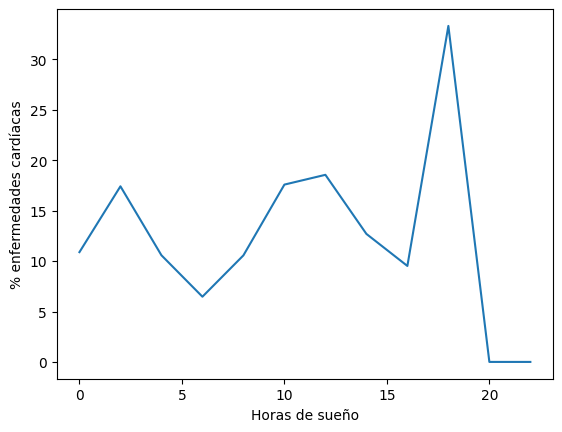

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(data=serie_sleeptime)
plt.xlabel('Horas de sueño')
plt.ylabel('% enfermedades cardíacas')

# Mostrar el gráfico
plt.show()

Como se observa en la gráfica, el porcentaje de riesgo oscila de forma importante y no se percibe ninguna tendencia clara.

# 3.- Preprocesamiento de los datos
### 3.1.- Verificación de la calidad de los datos

Como se puede observar en las siguientes celdas, el dataframe sujeto al estudio tiene 18 columnas, y 319795 filas. Carece de valores nulos, aunque sí tiene valores duplicados que más adelante se eliminarán. En lo que se refiere a la cardinalidad, es muy baja porque los valores únicos son muy pocos. En muchas de las columnas únicamente hay dos valores, ya que provienen de preguntas cerradas cuya única respuesta era Sí o No.

In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Tamaño del dataframe original:

In [ ]:
df.shape

(319795, 18)

In [ ]:
def data_report(df):
    # Sacamos los NOMBRES
    cols = pd.DataFrame(df.columns.values, columns=["NOMBRE"])

    # Sacamos los TIPOS
    types = pd.DataFrame(df.dtypes.values, columns=["TIPO DE DATO"])

    # Sacamos los MISSINGS
    percent_missing = round(df.isnull().sum() * 100 / len(df), 2)
    percent_missing_df = pd.DataFrame(percent_missing.values, columns=["VALORES NULOS (%)"])

    # Sacamos los VALORES UNICOS
    unicos = pd.DataFrame(df.nunique().values, columns=["VALORES UNICOS"])
    
    percent_cardin = round(unicos['VALORES UNICOS']*100/len(df), 2)
    percent_cardin_df = pd.DataFrame(percent_cardin.values, columns=["CARDINALIDAD (%)"])

    concatenado = pd.concat([cols, types, percent_missing_df, unicos, percent_cardin_df], axis=1, sort=False)
    concatenado.set_index('NOMBRE', drop=True, inplace=True)

    return concatenado.T
data_report(df)

NOMBRE,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
TIPO DE DATO,object,float64,object,object,object,float64,float64,object,object,object,object,object,object,object,float64,object,object,object
VALORES NULOS (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
VALORES UNICOS,2,3604,2,2,2,31,31,2,2,13,6,4,2,5,24,2,2,2
CARDINALIDAD (%),0.0,1.13,0.0,0.0,0.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.0


### 3.2.- Decisiones, imputaciones y transformación de variables

#### 3.2.1- Eliminación de duplicados

El primer paso en el preprocesado del dataframe es eliminar los registros que pueda haber duplicados. 

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(301717, 18)

Originalmente el dataframe tenía 319795 filas. Después de eliminar los registros duplicados, el dataframe tiene 301717. Es decir, había 18078 registros duplicados que ya se han eliminado.

#### 3.2.2.- Transformación de variables

El segundo paso va a ser la conversión de variables categóricas en numéricas para la posterior aplicación de modelos de Machine Learning. Esta transformación se va a dar utilizando el método map y diccionarios específicos para las variables que lo requieran:
- *Race*: los seis elementos se convierten en cifras del 0 al 5 por medio de diccionario dict_race.
- *Diabetic*: los 4 elementos únicos de esta variable se convierten en cifras de 0 a 3, por medio del diccionario dict_diab
- *Sex*: con el diccionario dict_sex, se convierten los dos géneros en 0s y 1s.
- *AgeCategory*: cada tramo de edad tiene asignado un número del 1 al 12 con el diccionario dict_age
- Resto de variables: Yes y No se transforman en 1 y 0 con el diccionario dict_yes_no

In [ ]:
lista_race=df['Race'].unique().tolist()
lista_race= sorted(lista_race)
lista_race= list(enumerate(lista_race))
lista_intercambiada = [(tupla[1], tupla[0]) for tupla in lista_race]
dict_race= dict(lista_intercambiada)
dict_race

{'American Indian/Alaskan Native': 0,
 'Asian': 1,
 'Black': 2,
 'Hispanic': 3,
 'Other': 4,
 'White': 5}

In [ ]:
lista_age= df['AgeCategory'].unique().tolist()
lista_age= sorted(lista_age)
lista_age= list(enumerate(lista_age))
lista_intercambiada = [(tupla[1], tupla[0]) for tupla in lista_age]
dict_age= dict(lista_intercambiada)
dict_age

{'18-24': 0,
 '25-29': 1,
 '30-34': 2,
 '35-39': 3,
 '40-44': 4,
 '45-49': 5,
 '50-54': 6,
 '55-59': 7,
 '60-64': 8,
 '65-69': 9,
 '70-74': 10,
 '75-79': 11,
 '80 or older': 12}

In [ ]:
dict_race={'American Indian/Alaskan Native': 0,
 'Asian': 1,
 'Black': 2,
 'Hispanic': 3,
 'Other': 4,
 'White': 5}
dict_diab={'No': 0, 'No, borderline diabetes': 1, 'Yes (during pregnancy)': 2, 'Yes': 3}
dict_health={'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4}
dict_yes_no = {'Yes':1, 'No':0}
dict_sex= {'Male':1, 'Female':0}
for columna in df.columns:
    if columna=='Sex':
        df[columna]=df[columna].map(dict_sex)
    elif columna=='AgeCategory':
        df[columna]=df[columna].map(dict_age)
    elif columna== 'Race':
        df[columna]= df[columna].map(dict_race)
    elif columna=='GenHealth':
        df[columna]= df[columna].map(dict_health)
    elif columna=='Diabetic':
        df[columna]= df[columna].map(dict_diab)   
    elif df[columna].dtypes==object:
        df[columna]=df[columna].map(dict_yes_no)
    else:
          pass
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,3,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,3,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,3,8.0,0,0,0


#### 3.2.3.- Separación de datos para el test

El tercer paso previo a la búsqueda de un modelo que se ajuste a nuestros datos es la separación de una porción de los datos, para poder testear el modelo.  La separación se hace de forma aleatoria con *train_test_split*, y después esos valores se convierten en otro dataframe llamado *df_test*. Al dataframe original se le eliminan dichos valores, y obtenemos el dataframe para las etapas de training y validación, que se llamará *df*.

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape

(241373, 17)

In [ ]:
df= pd.DataFrame(X_train)
df['HeartDisease']= y_train
df.reset_index(inplace=True, drop=True)
df.to_csv('data/df.csv', index=False)
df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.97,1,0,0,0.0,2.0,0,0,10,5,0,1,3,7.0,0,0,0,0
1,39.16,0,0,0,0.0,0.0,0,0,3,5,0,0,3,8.0,0,0,0,0
2,26.97,0,0,1,20.0,0.0,0,1,10,5,3,0,0,7.0,0,1,0,1
3,24.41,1,0,0,0.0,30.0,0,0,4,5,0,1,3,5.0,0,0,0,0
4,22.15,0,0,0,0.0,0.0,0,1,10,5,0,1,4,8.0,0,0,0,0


In [ ]:
df_test=pd.DataFrame(X_test)
df_test['HeartDisease']=y_test
df_test.reset_index(inplace=True, drop=True)
df_test.to_csv('data/df_test.csv', index=False)
df_test.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,35.59,0,0,0,0.0,2.0,1,0,9,2,0,1,3,8.0,0,0,0,0
1,27.80,0,0,0,0.0,0.0,0,1,11,2,3,1,2,8.0,1,0,0,0
2,25.79,0,0,0,2.0,2.0,0,0,6,5,0,1,3,8.0,0,0,0,0
3,38.47,1,0,1,1.0,1.0,0,0,6,2,3,1,2,10.0,0,0,0,1
4,27.32,0,0,0,0.0,2.0,0,0,4,2,0,1,3,8.0,0,0,0,0


#### 3.2.4.- Análisis de outliers

Un *outlier* es una observación anormal y extrema en una muestra estadística o serie temporal de datos que puede afectar potencialmente a la estimación de los parámetros del mismo. En palabras más sencillas, un outlier sería una observación dentro de una muestra o una serie temporal de datos que no es consistente con el resto.

Desde el punto de vista estadístico, es el conjunto de los datos que cumplen cualquiera de estos dos criterios:
- q<Q1-1.5IQR
- q>Q3+1.5IQR
<p align="center">
<img   src="resources/img/outliers.png" width="600px"></p>

Para obtener estos valores, nos vamos a apoyar en *df.describe()*

In [ ]:
# Outliers +-3IQR
df_estadistica= pd.DataFrame(df.describe())
df_estadistica.loc['IQR']=df_estadistica.loc['75%']-df_estadistica.loc['25%']
df_estadistica.loc['Q1-1.5IQR']= df_estadistica.loc['25%']-1.5*df_estadistica.loc['IQR']
df_estadistica.loc['Q3+1.5IQR']= df_estadistica.loc['75%']+1.5*df_estadistica.loc['IQR']
df_estadistica.T


,count,mean,std,min,25%,50%,75%,max,IQR,Q1-1.5IQR,Q3+1.5IQR
BMI,241373.0,28.439503,6.470049,12.02,24.03,27.41,31.65,94.85,7.62,12.6,43.08
Smoking,241373.0,0.422094,0.493894,0.00,0.00,0.00,1.00,1.00,1.00,-1.5,2.50
AlcoholDrinking,241373.0,0.071611,0.257844,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00
Stroke,241373.0,0.039992,0.195941,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00
PhysicalHealth,241373.0,3.571675,8.136364,0.00,0.00,0.00,2.00,30.00,2.00,-3.0,5.00
MentalHealth,241373.0,4.123353,8.128918,0.00,0.00,0.00,4.00,30.00,4.00,-6.0,10.00
DiffWalking,241373.0,0.147531,0.354635,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00
Sex,241373.0,0.471283,0.499176,0.00,0.00,0.00,1.00,1.00,1.00,-1.5,2.50
AgeCategory,241373.0,6.505462,3.584057,0.00,4.00,7.00,9.00,12.00,5.00,-3.5,16.50
Race,241373.0,4.366681,1.233353,0.00,5.00,5.00,5.00,5.00,0.00,5.0,5.00


Calculamos los outliers de las cuatro variables numéricas, tanto en *df* como en *df_test*:

In [ ]:
df_outliers= df.loc[lambda row: (row['BMI']>df_estadistica.loc['Q3+1.5IQR']['BMI']) | 
                    (row['PhysicalHealth']>df_estadistica.loc['Q3+1.5IQR']['PhysicalHealth']) | 
                    (row['MentalHealth']>df_estadistica.loc['Q3+1.5IQR']['MentalHealth']) | 
                    (row['SleepTime']>df_estadistica.loc['Q3+1.5IQR']['SleepTime'])]
df_outliers.reset_index(inplace=True, drop=True)
df_outliers.shape

(62773, 18)

In [ ]:
df_outliers_test= df_test.loc[lambda row: (row['BMI']>df_estadistica.loc['Q3+1.5IQR']['BMI']) | 
                    (row['PhysicalHealth']>df_estadistica.loc['Q3+1.5IQR']['PhysicalHealth']) | 
                    (row['MentalHealth']>df_estadistica.loc['Q3+1.5IQR']['MentalHealth']) | 
                    (row['SleepTime']>df_estadistica.loc['Q3+1.5IQR']['SleepTime'])]
df_outliers_test.reset_index(inplace=True, drop=True)
df_outliers_test.shape

(15635, 18)

Los outliers que cumplen el criterio q<Q1-1.5IQR son una fracción mínima del total, y que no se va a considerar en el conjunto total de outliers dada la diferencia en magnitud y su escasa frecuencia.

In [ ]:
df_outliers_down= df.loc[lambda row: (row['BMI']<df_estadistica.loc['Q1-1.5IQR']['BMI']) | 
                         (row['PhysicalHealth']<df_estadistica.loc['Q1-1.5IQR']['PhysicalHealth']) | 
                         (row['MentalHealth']<df_estadistica.loc['Q1-1.5IQR']['MentalHealth']) | 
                         (row['SleepTime']<df_estadistica.loc['Q1-1.5IQR']['SleepTime'])]
df_outliers_down.shape

(1084, 18)

In [ ]:
out_down_bmi= df[df['BMI']<df_estadistica.loc['Q1-1.5IQR', 'BMI']]
out_down_bmi.shape

(19, 18)

In [ ]:
out_down_phy= df[df['PhysicalHealth']<df_estadistica.loc['Q1-1.5IQR', 'PhysicalHealth']]
out_down_phy.shape

(0, 18)

In [ ]:
out_down_men= df[df['MentalHealth']<df_estadistica.loc['Q1-1.5IQR', 'MentalHealth']]
out_down_men.shape

(0, 18)

In [ ]:
out_down_sleep= df[df['SleepTime']<df_estadistica.loc['Q1-1.5IQR', 'SleepTime']]
out_down_sleep.shape

(1065, 18)

In [ ]:
out_up_phy= df[df['PhysicalHealth']>df_estadistica.loc['Q3+1.5IQR', 'PhysicalHealth']][df['HeartDisease']==1]
out_up_phy.shape

(7190, 18)

In [ ]:
out_up_bmi= df[df['BMI']>df_estadistica.loc['Q3+1.5IQR', 'BMI']][df['HeartDisease']==1]
out_up_bmi.shape

(806, 18)

In [ ]:
out_up_men= df[df['MentalHealth']>df_estadistica.loc['Q3+1.5IQR', 'MentalHealth']][df['HeartDisease']==1]
out_up_men.shape

(3468, 18)

In [ ]:
out_up_sleep= df[df['SleepTime']>df_estadistica.loc['Q3+1.5IQR', 'SleepTime']][df['HeartDisease']==1]
out_up_sleep.shape

(467, 18)

Distribución de outliers

Se han filtrado los outliers de cada variable, y a su vez se ha considerado la prevalencia de *HeartDisease* en cada grupo. 
- *PhysicalHealth* : 37723, de ellos el 19% es positivo en *HeartDisease*
- *MentalHealth*:  31766, el 10,9% es positivo en HeartDisease
- *BMI*: 7127, y el 11,3% es positivo en HeartDisease
- *SleepTime*: 2575, y el 18.1% es positivo en HeartDisease

En los cuatro casos hay un porcentaje de positivos por encima del valor medio del 9%. Por ello, el estudio considerá la posibilidad de hacer un modelo de Machine Learning específico para los outliers, considerando por lo tanto tres opciones:
- Conjunto de datos original
- Conjunto de datos original sin outliers
- Outliers

In [ ]:
df_outliers= df_outliers.drop_duplicates()
df_sin_outliers = df.drop(df_outliers.index)
df_sin_outliers.reset_index(inplace=True, drop=True)
df_sin_outliers_test = df_test.drop(df_outliers_test.index)
df_sin_outliers_test.reset_index(inplace=True, drop=True)

In [ ]:
df.to_csv('data/df.csv', index=False)
df_outliers.to_csv('data/df_outliers.csv', index= False)
df_sin_outliers.to_csv('data/df_sin_outliers.csv', index=False)
df_outliers_test.to_csv('data/df_outliers_test.csv', index= False)
df_sin_outliers_test.to_csv('data/df_sin_outliers_test.csv', index=False)

# 4.- Modelado


### 4.1.- Entrenamiento de modelos supervisados/no supervisados

Para la búsqueda del modelo más adecuado para estos datos, tendremos en cuenta que los datos no están balanceados, y es necesario plantear técnicas de balanceo para obtener un buen recall. Por consiguiente, la estrategia para el modelado será la de este diagrama.
<p align="center">
<img   src="resources/img/estrategia.JPG" width="600px"></p>

- Análisis básico: Se trata de plantear los modelos indicados sin ninguna técnica para el balanceo, ni ningún ajuste de parámetros.
- Algoritmos balanceados: Todos los modelos disponen de opciones para el ajuste de los pesos de las fracciones minoritaria y mayoritaria, para que lleguen a estar balanceadas. En los cuatro modelos planteados este ajuste se hace por medio del atributo *class_weight= 'balanced'*.
- Optimización de hiperparámetros con *GridSearchCV*: Se consideran distintos hiperparámetros de cada modelo con objeto de mejorar los resultados obtenidos.
- Oversampling/Undersampling: Es un bloque de técnicas que modifican el conjunto de datos. En un caso por generación aleatoria de nuevos datos, y en el otro por eliminación aleatoria de datos existentes, pueden llegar a crear unos datos balanceados que mejoren el recall. El problema fundamental de estas técnicas es que alteran el dataset sin ningún criterio, y en el caso del oversampling, se puede llegar a caer en overfitting. Undersampling, en cambio, puede hacer que se pierda información importante ya que se elimina una parte importante de los datos de la fracción mayoritaria.
- Generación sintética de muestras: Creación de muestras sintéticas (no idénticas) utilizando SMOTE, ADASYN y SVSMOTE, para balancear los datos. El riesgo de esta técnica es que podemos alterar la distribución “natural” de esa clase y confundir al modelo en su clasificación.
- Ensemble: Métodos de ensemble balanceados que entrenan varios modelos, y que se aseguran de tomar muestras de entrenamiento equilibradas. Los dos métodos empleados serán Balanced Bagging Classifier y RUS Boost Classifier

El proceso completo de modelado se encuentra en el archivo [modelos.ipynb](model/modelos.ipynb) 

### 4.3.- Métrica seleccionada

Como ya se ha explicado anteriormente, los datos del estudio se caracterizan por no estar balanceados. Es decir, dentro de la variable objetivo *HeartDisease*, la fracción de positivos o 1s es muy inferior a la fracción de negativos o 0s. 

Por lo tanto, a la hora de medir la eficacia del modelo, puede resultar totalmente engañoso, ya que cualquier modelo de Machine Learning que se implemente, detectará muy fácilmente los casos negativos, mientras que no será así para los casos positivos. Por lo tanto, debe establecer una métrica que defina la capacidad de predecir correctamente los casos positivos, a pesar de que están en clara minoría frente a los casos negativos. 

Las métricas que se pueden considerar son:

- Accuracy: indica el número total de predicciones correctas, dividido entre el número total de predicciones.

    Accuracy = (TP + TN) / Total

- Precision: De los que ha predicho como positivos, cuántos en realidad ha acertado. Precision, a diferencia del recall, pone foco en minimizar los FP

    Precision = TP / (TP + FP)

- Recall: es la relación entre los aciertos de una clase y todos los elementos que pertenece a esa. Aquí tendríamos un ratio entre los diagnósticos positivos correctos y todos los enfermos existentes. Es una métrica que se utiliza cuando queremos poner el foco en minimizar los FN (Falsos Negativos).

    Recall = TP / (TP + FN)

- F1 Score: es una combinación de precision y recall, en una sóla fórmula. 

    F1-score = 2 * Precision * Recall / (Precision + Recall)

En nuestro caso, para favorecer la detección de los positivos, que están en minoría frente a los negativos, tenemos que conseguir un alto valor de **recall**, que identifique correctamente los positivos y minimice los falsos negativos.

### 4.2.- Evaluación de los modelos.

Después de la etapa de modelado, se ha obtenido un valor de recall para cada modelo analizado, que se muestra a continuación. En la tabla se consideran varios aspectos:
- Modelo: Logistic Regression, Decision Tree Classifier, Random Forest Classifier o Linear SVC.
- Parámetros optimizados: Si se utilizan los parámetros resultantes de la optimización con *GridSearchCV*.
- Balanceo: Técnica empleada para el balanceo de los datos; Ajuste de peso, Undersampling, Oversampling, SMOTE, ADASYN, SVSMOTE, RUS Boost Classifier (RUS BC), o Balanced Bagging Classifier (BBC)
- Dataframe: Original, outliers o sin outliers. Son los tres dataframes planteados al comienzo del estudio, aunque posteriormente se descarta el análisis por separado, ya que no hay una diferencia apreciable en los resultados. 

In [ ]:
import pandas as pd
df_resultados= pd.read_excel('data/resultados.xlsx' )
df_resultados.sort_values(by='Recall', ascending=False)

,Modelo,Parametros optimizados,Balanceo,Dataframe,Recall
17,Decision Tree Classifier,Si,Ajuste de peso,Original,0.8422
25,Decision Tree Classifier,Si,Undersampling,Original,0.8422
21,Decision Tree Classifier,Si,Oversampling,Original,0.8422
18,Random Forest Classifier,Si,Ajuste de peso,Original,0.8130
26,Random Forest Classifier,Si,Undersampling,Original,0.8090
22,Random Forest Classifier,Si,Oversampling,Original,0.8039
29,Decision Tree Classifier,Si,SMOTE,Original,0.7994
45,Decision Tree Classifier,Si,RUS BC,Original,0.7886
40,Logistic Regression,Si,BBC,Original,0.7839
41,Decision Tree Classifier,Si,BBC,Original,0.7758


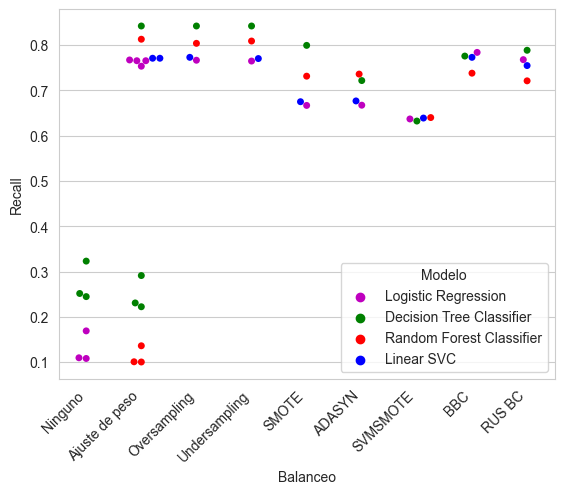

In [ ]:
sns.swarmplot(data= df_resultados, x="Balanceo", y="Recall",
            hue="Modelo", palette=["m", "g", "r", "b"])
plt.xticks(rotation=45, ha='right') 
plt.show()

A la vista de los resultados, se pueden extraer varias conclusiones:
- Como ya se indicó durante el modelado, no se aprecia una diferencia significativa entre los datos con y sin outliers, para plantear modelos por separado.
- Ha quedado demostrado que es necesario utilizar alguna estrategia de balanceo de datos para poder mejorar el valor de recall. Los modelos sin balanceo han obtenido valores muy inferiores.
- Aunque la bibliografía recomienda las técnicas de generación sintética de datos, como SMOTE, ADASYN o SVSMOTE, no han llegado a tener los mejores resultados. 


### 4.3.- Selección e interpretación del modelo final.

El modelo que ha tenido un recall más alto es el Decision Tree Classifier, con un valor de 0.8422, con tres técnicas distintas para el balanceo de las dos fracciones: Ajuste de pesos, oversampling y undersampling. Según el fundamento teórico del Oversampling, esta técnica corre el riesgo de alterar la distribución y la naturaleza de los datos, ya que se están añadiendo datos de forma aleatoria y sin ningún criterio.Asímismo, Undersampling tiene el inconveniente de eliminar datos que pueden llegar a ser relevantes, y puede empeorar el modelo. Teniendo en cuenta estos dos puntos, consideramos que el modelo más adecuado es Decision Tree Classifier, con los parámetros:
- class_weight='balanced'
- max_depth=3
- min_samples_split=2

# 5.- Predicción y resultados finales

Una vez generado el archivo .pkl, se puede volver a cargar y ver el diagrama del modelo de Machine Learning que se ha desarrollado.

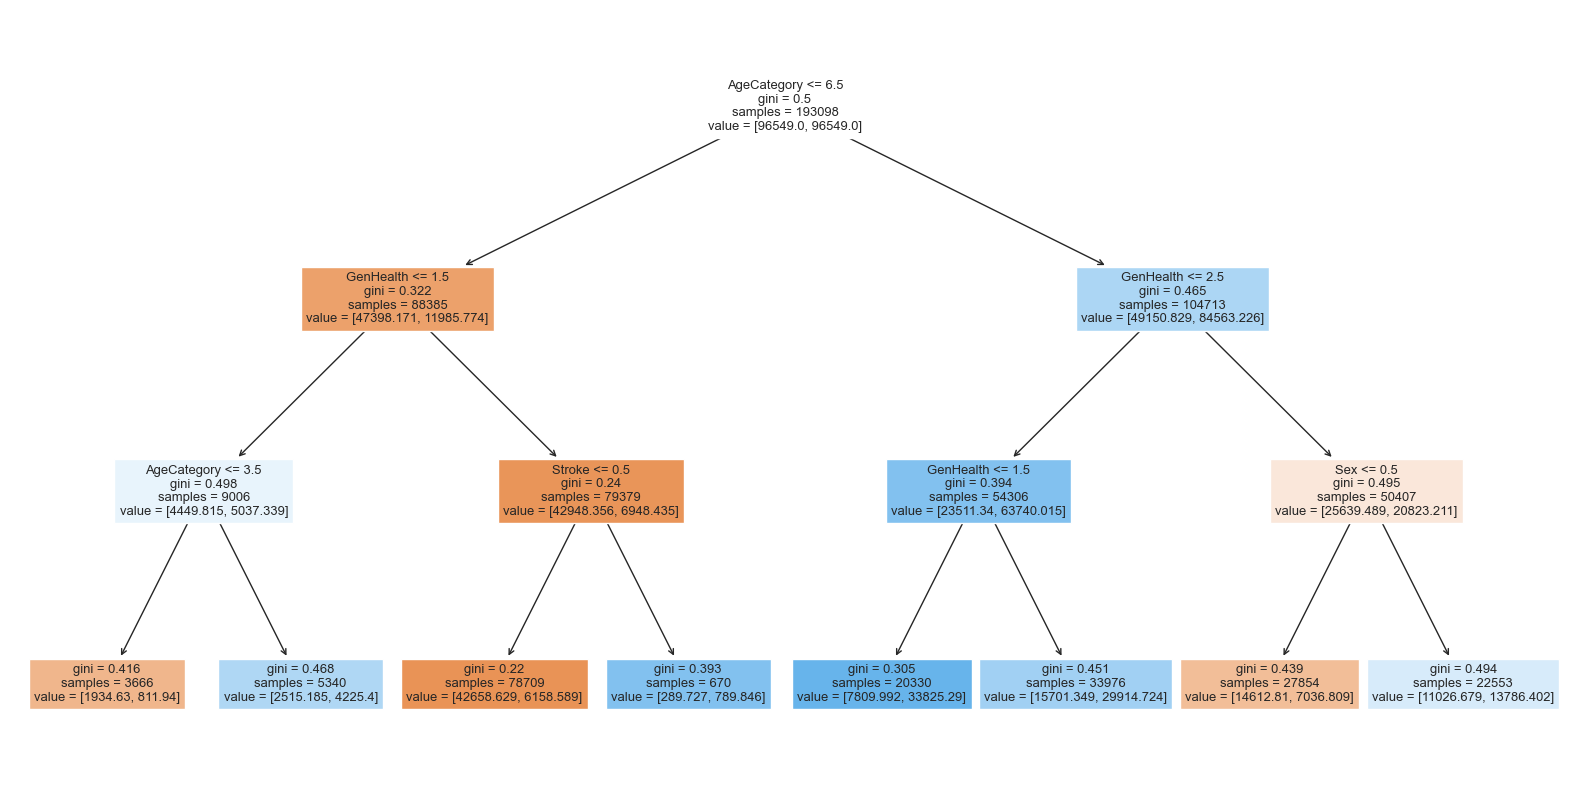

In [ ]:
import pickle
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

with open('model/production/model_230818122335.pkl', 'rb') as file:
    model = pickle.load(file)

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=df.columns.tolist()) 
plt.show()

### 5.2.- Visualización de los resultados finales y predicciones

Para ver los resultados de un caso particular se ha creado la función *calculo_heartdisease()*, que permite calcular la probabilidad de sufrir una enfermedad cardíaca basándose en los parámetros de cualquier individuo. 

In [ ]:
def calculo_heartdisease():
  peso = int(input("Teclee su peso en kilogramos:"))
  altura =float( input("Teclee su estatura (p.ej, 1,56): "))
  bmi = round(peso/altura**2,2)
  smoking = input("¿Ha fumado más de 100 cigarrillos a lo largo de su vida? (Teclee s o n):")
  alcohol = input("¿Bebe  alcohol habitualmente? (Teclee s o n)")
  stroke = input("¿Ha tenido alguna vez un accidente cerebrovascular? (Teclee s o n)")
  phyhealth = input("De los últimos 30 días, ¿cuantos días ha tenido problemas de salud física:")
  menhealth = input("De los últimos 30 días, ¿cuantos días ha tenido problemas de salud mental:")
  diffwalk = input("¿Tiene dificultades para andar o subir escaleras? (Teclee s o n)")
  sex = input("¿Cuál es su género? (Teclee 1 si es hombre y 0 si es mujer):")
  age = int(input("¿Cuántos años tiene?:"))  
  race = input("¿A qué raza pertenece? (Teclee el número correspondiente. Nativo americano: 0, asiático:1, negro:2, latino: 3, otro:4, blanco:5)")
  diab = input("¿Es usted diabético? (Teclee s o n):")
  phyact = input("¿Ha realizado algún ejercicio físico aparte del trabajo en los últimos 30 días? (Teclee s o n)")
  genhealth= input("Valore de 0 a 4 su estado de salud en general, siendo 0 malo y 4 excelente")
  sleep = int(input("¿Cuántas horas diarias duerme?:"))
  asthma = input("¿Es usted asmático? (Teclee s o n)")
  kidney = input("¿Le han diagnosticado alguna vez una enfermedad renal distinta de cálculos, infección de vejiga o incontinencia? (Teclee s o n")
  skin= input("¿Ha tenido cáncer de piel? (Teclee s o n)")

  diccionario_edad = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80-120': 12
}

  age_cat = None
  for rango_edad, cifra in diccionario_edad.items():
      rango = [int(x) for x in rango_edad.split('-')]
      if rango[0] <= age <= rango[1]:
          age_cat = cifra
          break

  lista = [bmi, smoking, alcohol, stroke, phyhealth, menhealth, diffwalk, sex, age_cat, race, diab, phyact, genhealth, sleep, asthma, kidney, skin]
  dict_yes_no = {'s': 1, 'n': 0}
  lista_modificada = [dict_yes_no[item] if item in dict_yes_no else item for item in lista]
  prediction = model.predict_proba([lista_modificada])
  porcentaje = round((prediction[0][1]*100),1)
  print(f"Tiene un {porcentaje}% de posibilidades de sufrir una enfermedad cardiaca")
  return 

calculo_heartdisease()

Tiene un 81.2% de posibilidades de sufrir una enfermedad cardiaca


Otra forma de obtener los mismos datos sería a partir de una lista hecha "a mano" con los datos requeridos, manteniendo el mismo orden que tiene el conjunto de los datos del estudio. Se obtiene un array bidimensional, en el que la primera cifra es la probabilidad de pertenecer a la clase 0, es decir, no sufrir una enfermedad cardiaca, y la segunda cifra es la probabilidad de pertenecer a la clase 1 o de padecer una enfermedad cardíaca. 

In [ ]:
prediccion_manual= model.predict_proba([[23,0,0,0,0,0,0,1,5,5,0,1,3,6,0,0,0]])
prediccion_manual

array([[0.87384392, 0.12615608]])

# 6.- Conclusiones y futuros pasos

### 6.1.- Análisis de los resultados 

A partir del modelo seleccionado, se extraen los pesos asociados a cada variable. De esta forma, se puede determinar qué variables han sido las más importantes, y que más han influido en el proceso de clasificación. 

In [ ]:
feat_model=pd.DataFrame(model.feature_importances_, index=df.columns[:-1], columns=['Valor'])
feat_model.sort_values(by='Valor', ascending=False).head(7)

,Valor
AgeCategory,0.602268
GenHealth,0.320747
Sex,0.047233
Stroke,0.029752
Diabetic,0.000000
KidneyDisease,0.000000
Asthma,0.000000


Se observa que únicamente 4 variables han participado en la clasificación, siendo el peso del resto de variables nulo. La más importante es la edad, lo que concuerda con el conocimiento médico actual. Al calcular la frecuencia condicionada [en el apartado 2.2.3.1](#2231--frecuencia-condicionada-de-la-variable-target), hemos visto que hay una tendencia clara ascendente, de forma que la frecuencia del riesgo cardiovascular supera el 15% para los mayores de 70 años.

Respecto a la variable *GenHealth*, el resultado obtenido concuerda con el análisis de su frecuencia condicionada, ya que aquellos que reconocieron tener una mala salud, tienen una incidencia del riesgo cardiovascular del 34%. 

En relación al género, tiene un peso muy pequeño, ya que no hay una gran diferencia entre los valores para hombres y mujeres. Como ya se ha calculado, el 10,4% de los hombres y el 7,4% de las mujeres tienen enfermedades cardíacas.

La variable *Stroke*, referida a haber sufrido un accidente cerebrovascular, también tiene una pequeña influencia. Esto resulta obvio, ya que este tipo de accidentes pueden motivarse por enfermedades cardíacas. En realidad, no es una causa del riesgo, sino más bien una consecuencia. 

Por otra parte, hay otras variables que han originado una frecuencia condicionada alta, pero el modelo seleccionado no las ha usado en el proceso de clasificación, como son:

- *DiffWalking*: el 22% de los que han reconocido este problema, tiene también una enfermedad cardiaca. 
- *Diabetic*: casi el 22% de los diabéticos padece también alguna enfermedad cardiaca. 
- *PhysicalHealth*: a partir de los 15 días con mala salud, la frecuencia sube al 18%.
- *Asthma*: el 11,5% de los enfermos de asma tienen una enfermedad cardíaca.
- *KidneyDisease*: el 29% de estos enfermos tienen alguna patología cardíaca. 
- *SkinDisease* el 16,7% de los enfermos de cáncer de piel también tienen una patología cardíaca. 

### 6.2.- Propuesta de futuras mejoras y optimizaciones

A la vista de los resultados, no se ha detectado la influencia de otros factores, como el sobrepeso, tabaquismo o alcoholismo, y ejercicio físico. Esto se podría solucionar reformulando las preguntas realizadas en la encuesta. En relación al tabaco, la pregunta era si se habían fumado más de 100 cigarrillos en toda su vida. Esto no implica que se fume habitualmente y durante un período largo de tiempo, que es lo que ya ha identificado como un claro factor de riesgo. En este caso la pregunta se debería haber formulado para detectar este hecho, y no un consumo puntual. En el caso del alcohol, existe un problema similar, ya que se refería a un consumo de alcohol a la semana que podría estar asociado a una situación puntual propia de un cierto período de tiempo a lo largo de su vida. En lo que a ejercicio físico se refiere, el encuestador preguntaba si se había hecho ejercicio físico fuera del trabajo durante el último mes. En mi opinión, debería haber extraído más información sobre la periodicidad e intensidad del ejercicio, para poder valorarlo. 

Otros parámetros que se deben considerar son el nivel de colesterol en sangre, la hipertensión y la obesidad. Aunque en el estudio sí se ha considerado el índice de masa corporal, no ha resultado ser un factor influyente en el estudio. Este hecho habría que contrastarlo con otros estudios, ya que es sabido desde hace años que el sobrepeso influye en las patologías cardíacas. Asímismo, el colesterol y la hipertensión no se han considerado en el estudio, pero se deberían haber tenido en cuenta para conseguir un resultado más ajustado a la realidad. 

Por consiguiente, para obtener un resultado más consistente y realista, habría que establecer varias medidas:
- Reformular las preguntas para profundizar en los factores que se han considerado.
- Incluir en el estudio factores ya conocidos por su influencia, como colesterol o hipertensión. 
- Obtener un conjunto de datos más balanceado, si es posible, para evitar el uso de modelos de generación sintética de muestras, oversampling o undersampling. Por ejemplo, enfocando el estudio hacia personas con riesgo en lugar a la población en general.
- Eliminar la pregunta sobre la variable *Stroke*, sobre el hecho de haber sufrido ya un accidente cerebrovascular, porque es un riesgo ya materializado que obviamente está relacionado con las afecciones cardíacas. Además, se puede considerar bastante más grave y puede ser objeto por sí solo de otros estudios.

# Bibliografía
https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c

https://imbalanced-learn.org/stable/user_guide.html

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

ADASYN: Adaptive Synthetic Sampling Approach for Imbalanced Learning. Haibo He, Yang Bai, Edwardo A. Garcia, and Shutao Li

https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/#h-tips-to-improve-scoring-further

https://es.wikipedia.org/wiki/Coeficiente_phi